In [1]:
from ned import Net_moduls
import networkx as nx
import numpy as np

In [2]:
from nxviz.plots import CircosPlot

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Data

## Tehran Index DF and Tehran DF Normed Return 90 Far - 00 Far

In [4]:
tehran_index = pd.read_excel('../Data/Tehran_Indexes_Price_NoRegime.xlsx').set_index('date')

In [5]:
tehran_df_reg = pd.read_excel('../Data/Tehran_Indexes_NormedReturned_Regimed.xlsx').set_index('date')

## Tehran DF Normed Return 90 Far - 98 Dey

In [6]:
tehran_df = pd.read_excel('../Data/Tehran_Indexes_NormedReturned_Regimed.xlsx').set_index('date')
tehran_df = tehran_df[tehran_df.columns[:-9]].iloc[:-300]

## Tehran DF Normed Return 90 Far - 00 Far

In [7]:
tehran_df_completeDates = pd.read_excel('../Data/Tehran_Indexes_NormedReturned_Regimed.xlsx').set_index('date')
tehran_df_completeDates = tehran_df_completeDates[tehran_df_completeDates.columns[:-9]]

## Tehran Ox 2 Regimed DF Normed Return 90 Far - 00 Far 

In [8]:
tehran_df_TwoReg_Ox_1 = tehran_df_reg[tehran_df_reg['Ox_2']==0]
tehran_df_TwoReg_Ox_2 = tehran_df_reg[tehran_df_reg['Ox_2']==1]
tehran_df_TwoReg_Ox_1 = tehran_df_TwoReg_Ox_1[tehran_df_TwoReg_Ox_1.columns[:-9]]
tehran_df_TwoReg_Ox_2 = tehran_df_TwoReg_Ox_2[tehran_df_TwoReg_Ox_2.columns[:-9]]

## Tehran Ox 2 Regimed DF Normed Return 90 Far - 98 Dey 

In [9]:
tehran_df_TwoReg_Ox_1_98 = tehran_df[tehran_df_reg['Ox_2']==0]
tehran_df_TwoReg_Ox_2_98 = tehran_df[tehran_df_reg['Ox_2']==1]

/var/folders/mj/xw3m0dws3yq8j2md9n8j3g940000gn/T/ipykernel_1614/2195039282.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tehran_df_TwoReg_Ox_1_98 = tehran_df[tehran_df_reg['Ox_2']==0]
/var/folders/mj/xw3m0dws3yq8j2md9n8j3g940000gn/T/ipykernel_1614/2195039282.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tehran_df_TwoReg_Ox_2_98 = tehran_df[tehran_df_reg['Ox_2']==1]


## Tehran Ox 2 Regimed DF Normed Return 90 Far - 00 Far / Same Length

In [10]:
max_length_TwoReg_Ox_2 = min(len(tehran_df_TwoReg_Ox_1), len(tehran_df_TwoReg_Ox_2))
tehran_df_TwoReg_Ox_1_same_length = tehran_df_TwoReg_Ox_1[-max_length_TwoReg_Ox_2:]
tehran_df_TwoReg_Ox_2_same_length = tehran_df_TwoReg_Ox_2[-max_length_TwoReg_Ox_2:]

## Tehran Ox 2 Regimed DF Normed Return 90 Far - 98 Dey / Same Length

In [11]:
max_length_TwoReg_Ox_2_98 = min(len(tehran_df_TwoReg_Ox_1_98), len(tehran_df_TwoReg_Ox_2_98))
tehran_df_TwoReg_Ox_1_same_length_98 = tehran_df_TwoReg_Ox_1_98[-max_length_TwoReg_Ox_2_98:]
tehran_df_TwoReg_Ox_2_same_length_98 = tehran_df_TwoReg_Ox_2_98[-max_length_TwoReg_Ox_2_98:]

# 1) Tehran No Regime Pearson (Based on Median Threshold) Period of 90 Far - 98 Dey

In [12]:
nm = Net_moduls()
thr = nm.find_median_pearson_threshold(tehran_df)
pearson_network = nm.construct_network(tehran_df, method='pearson', threshold=thr)

In [13]:
nm.get_network_features(pearson_network)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,3,4,0.514141,509,0.847,0.514141,0.016796,0.621066,1.722222


<Figure size 1600x1200 with 0 Axes>

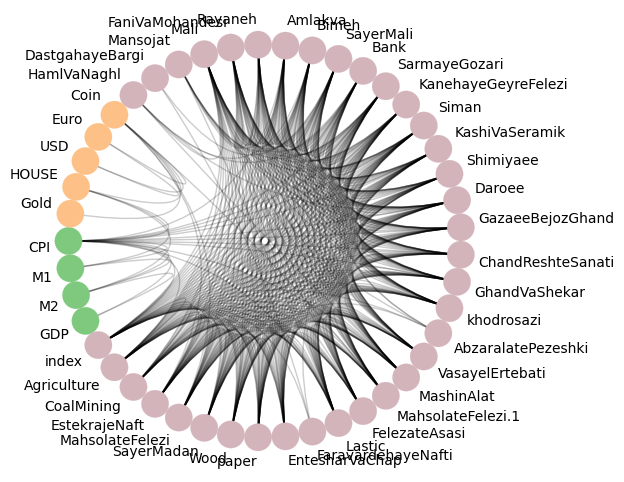

In [14]:
circos = nm.plot_circos_network(pearson_network)
circos.draw()

# 2) Tehran No Regime Pearson (Based on Median Threshold) Period of 90 Far - 00 Far

In [15]:
thr2 = nm.find_median_pearson_threshold(tehran_df_completeDates)
pearson_network_completeDates = nm.construct_network(tehran_df_completeDates, method='pearson', threshold=thr2)

In [16]:
nm.get_network_features(pearson_network_completeDates)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,3,5,0.489855,507,0.80846,0.489855,0.01715,0.609188,1.754589


<Figure size 1600x1200 with 0 Axes>

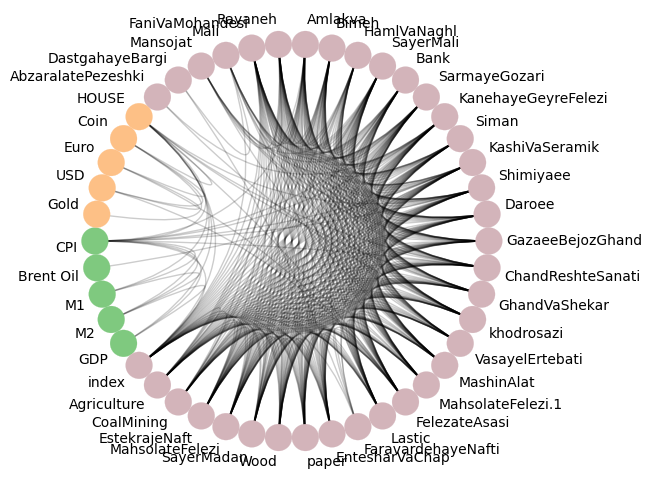

In [17]:
circos2 = nm.plot_circos_network(pearson_network_completeDates)
circos2.draw()
plt.savefig('Plots/pearson_network_completeDates.png', dpi=400,  bbox_inches="tight")

# 3) Tehran No Regime Entropy (Based on Median Threshold) Period of 90 Far - 98 Dey

In [18]:
nm = Net_moduls()
thr3 = nm.find_median_entropy_threshold(tehran_df)
entropy_network = nm.construct_network(tehran_df, method='entropy', threshold=thr3)

In [19]:
nm.get_network_features(entropy_network)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.680193,704,0.754392,0.680193,0.007268,0.769025,1.319807


<Figure size 1600x1200 with 0 Axes>

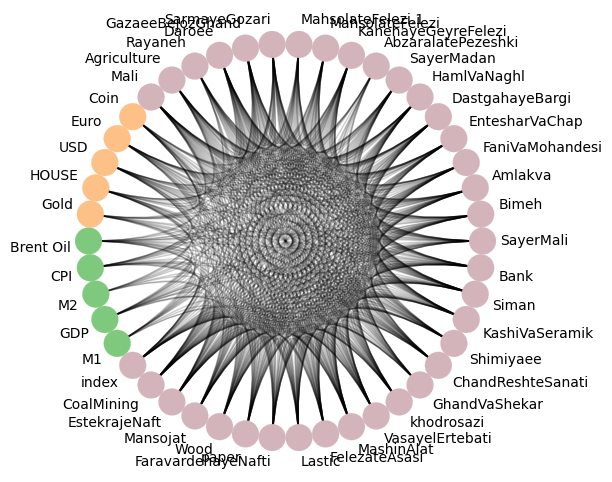

In [20]:
circos = nm.plot_circos_network(entropy_network)
circos.draw()

# 4) Tehran No Regime Entropy (Based on Median Threshold) Period of 90 Far - 00 Far

In [21]:
thr4 = nm.find_median_entropy_threshold(tehran_df_completeDates)
entropy_network_completeDates = nm.construct_network(tehran_df_completeDates, method='entropy', threshold=thr4)

In [22]:
thr4

0.0068102105225497

In [23]:
nm.get_network_features(entropy_network_completeDates)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.626087,648,0.797405,0.626087,0.008564,0.74549,1.376812


<Figure size 1600x1200 with 0 Axes>

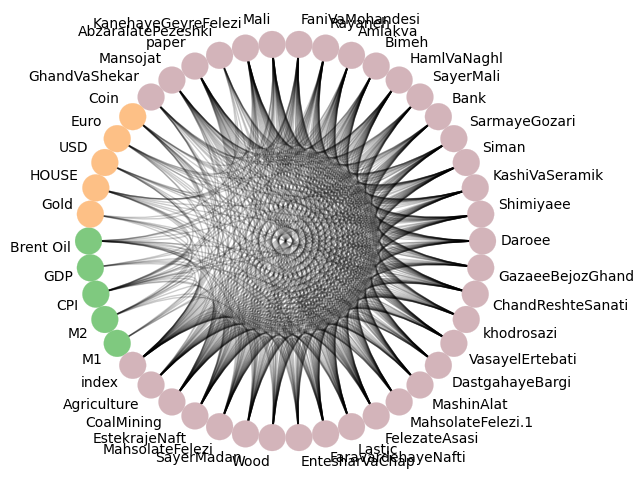

In [24]:
circos = nm.plot_circos_network(entropy_network_completeDates)
circos.draw()

# 5) Tehran No Regime Crossed (Based on Median Threshold) Period of 90 Far - 98 Dey

In [25]:
thr5 = nm.find_median_crossed_threshold(tehran_df)
crossed_network = nm.construct_network(tehran_df, method='crossed', threshold=thr5)

In [26]:
nm.get_network_features(crossed_network)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.283092,293,0.431573,0.283092,0.016579,0.586075,1.729469


<Figure size 1600x1200 with 0 Axes>

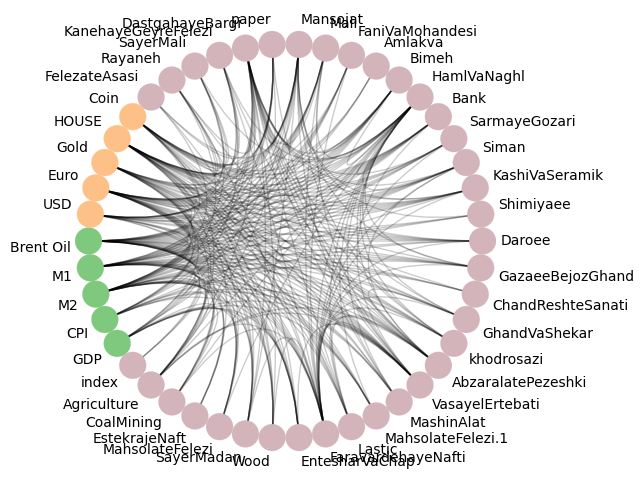

In [27]:
circos = nm.plot_circos_network(crossed_network)
circos.draw()

# 6) Tehran No Regime Crossed (Based on Median Threshold) Period of 90 Far - 00 Far

In [28]:
thr6 = nm.find_median_crossed_threshold(tehran_df_completeDates)
crossed_network_completeDates = nm.construct_network(tehran_df_completeDates, method='crossed', threshold=thr6)

In [29]:
nm.get_network_features(crossed_network_completeDates)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.280193,290,0.498924,0.280193,0.016557,0.586433,1.728502


<Figure size 1600x1200 with 0 Axes>

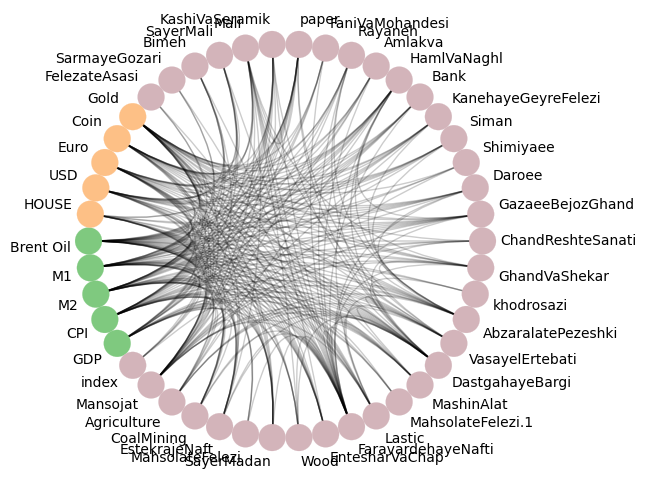

In [30]:
circos = nm.plot_circos_network(crossed_network_completeDates)
circos.draw()

# 7) Tehran 2 Regime Pearson (Based on Median Threshold) Period of 90 Far - 98 Dey

In [18]:
thr7_1 = nm.find_median_pearson_threshold(tehran_df_TwoReg_Ox_1_same_length_98)
thr7_2 = nm.find_median_pearson_threshold(tehran_df_TwoReg_Ox_2_same_length_98)
thr7 = min(thr7_1, thr7_2)

In [19]:
nm = Net_moduls()
pearson_network_TwoReg_Ox_1_98 = nm.construct_network(tehran_df_TwoReg_Ox_1_same_length_98, method='pearson', threshold=thr7)

In [20]:
nm.get_network_features(pearson_network_TwoReg_Ox_1_98)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.604831,626,0.800629,0.604831,0.009201,0.734194,1.404831


<Figure size 1600x1200 with 0 Axes>

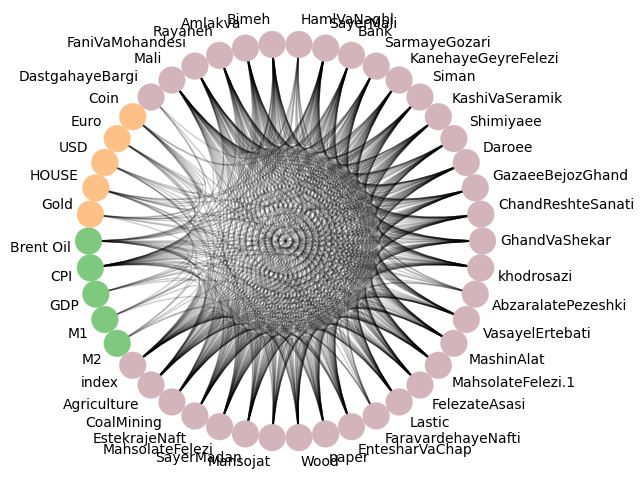

In [21]:
circos = nm.plot_circos_network(pearson_network_TwoReg_Ox_1_98)
circos.draw()

In [22]:
pearson_network_TwoReg_Ox_2_98 = nm.construct_network(tehran_df_TwoReg_Ox_2_same_length_98, method='pearson', threshold=thr7)

In [23]:
nm.get_network_features(pearson_network_TwoReg_Ox_2_98)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.564251,584,0.754106,0.564251,0.010057,0.709932,1.442512


<Figure size 1600x1200 with 0 Axes>

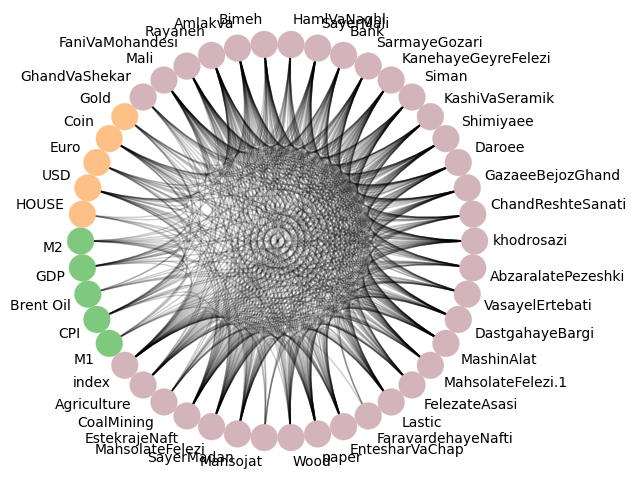

In [24]:
circos = nm.plot_circos_network(pearson_network_TwoReg_Ox_2_98)
circos.draw()

# 8) Tehran 2 Regime Pearson (Based on Median Threshold) Period of 90 Far - 00 Far

In [25]:
thr8_1 = nm.find_median_pearson_threshold(tehran_df_TwoReg_Ox_1_same_length)
thr8_2 = nm.find_median_pearson_threshold(tehran_df_TwoReg_Ox_2_same_length)
thr8 = min(thr8_1, thr8_2)

In [26]:
nm = Net_moduls()
pearson_network_TwoReg_Ox_1 = nm.construct_network(tehran_df_TwoReg_Ox_1_same_length, method='pearson', threshold=thr8)

In [27]:
nm.get_network_features(pearson_network_TwoReg_Ox_1)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.678261,702,0.83603,0.678261,0.00751,0.773094,1.330435


<Figure size 1600x1200 with 0 Axes>

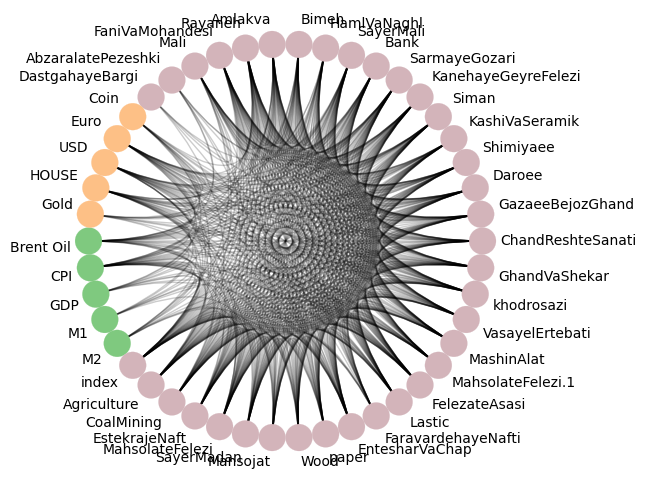

In [28]:
circos = nm.plot_circos_network(pearson_network_TwoReg_Ox_1)
circos.draw()

In [29]:
pearson_network_TwoReg_Ox_2 = nm.construct_network(tehran_df_TwoReg_Ox_2_same_length, method='pearson', threshold=thr8)

In [30]:
nm.get_network_features(pearson_network_TwoReg_Ox_2)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.557488,577,0.742671,0.557488,0.01043,0.704084,1.458937


<Figure size 1600x1200 with 0 Axes>

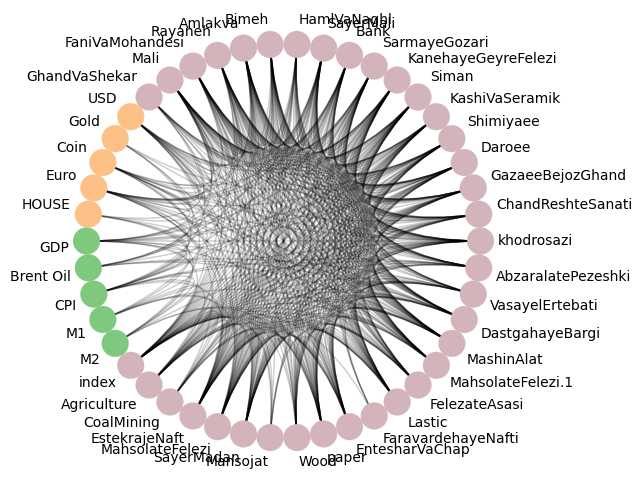

In [31]:
circos = nm.plot_circos_network(pearson_network_TwoReg_Ox_2)
circos.draw()

# 9) Tehran 2 Regime Pearson (Based on Median Threshold) Period of 90 Far - 98 Dey/ Last 100 Records

In [32]:
thr9_1 = nm.find_median_pearson_threshold(tehran_df_TwoReg_Ox_1_same_length_98[-100:])
thr9_2 = nm.find_median_pearson_threshold(tehran_df_TwoReg_Ox_2_same_length_98[-100:])
thr9 = min(thr7_1, thr7_2)

In [33]:
pearson_network_TwoReg_Ox_1_98_last100 = nm.construct_network(tehran_df_TwoReg_Ox_1_same_length_98[-100:], method='pearson', threshold=thr9)

In [34]:
nm.get_network_features(pearson_network_TwoReg_Ox_1_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.847475,839,0.881767,0.847475,0.003547,0.876689,1.152525


In [35]:
pearson_network_TwoReg_Ox_2_98_last100 = nm.construct_network(tehran_df_TwoReg_Ox_2_same_length_98[-100:], method='pearson', threshold=thr9)

In [36]:
nm.get_network_features(pearson_network_TwoReg_Ox_2_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.784848,777,0.823194,0.784848,0.005004,0.831308,1.215152


# 10) Tehran 2 Regime Pearson (Based on Median Threshold) Period of 90 Far - 98 Dey/ 50 windows of 100 Records

In [37]:
nm = Net_moduls()
pearson_network_TwoReg_Ox_1_98_averged = nm.get_network_features_averaged_median(tehran_df, regimes_column= tehran_df_reg['Ox_2'],method='pearson',edges_threshold=200, target_window=100, target_length=50)

Number of columns data in our DataFrame is = 46
fixed_thr= 0.20285909264144628


In [38]:
pearson_network_TwoReg_Ox_1_98_averged

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
Means,3.000000,5.000000,0.513350,488.860000,0.799560,0.513350,0.011845,0.582131,1.670707
STDs,NaN,NaN,0.022554,13.540581,0.019251,0.022554,0.003131,0.036553,NaN
Means,2.553191,4.361702,0.240943,233.720000,0.510633,0.240943,0.024611,0.501912,2.039427
STDs,0.502538,0.528556,0.047070,50.018788,0.046928,0.047070,0.003874,0.042394,0.160699


# 11) Tehran 2 Regime Pearson (Based on Median Threshold) Period of 90 Far - 00 Far/ 50 windows of 100 Records

In [39]:
nm = Net_moduls()
pearson_network_TwoReg_Ox_90_00_averged = nm.get_network_features_averaged_median(tehran_df_completeDates, regimes_column= tehran_df_reg['Ox_2'],method='pearson',edges_threshold=200, target_window=100, target_length=50)

Number of columns data in our DataFrame is = 46
fixed_thr= 0.15959918978229293


In [40]:
pearson_network_TwoReg_Ox_90_00_averged

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
Means,2.0,3.380000,0.519691,537.880000,0.750899,0.519691,0.011832,0.680263,1.520599
STDs,0.0,0.490314,0.010347,10.708837,0.021172,0.010347,0.000481,0.008319,0.021177
Means,2.0,3.360000,0.337068,332.660000,0.555947,0.337068,0.017428,0.584544,1.747778
STDs,0.0,0.484873,0.055681,56.036653,0.059865,0.055681,0.002295,0.032273,0.096756


# 12) Tehran 2 Regime Entropy (Based on Median Threshold) Period of 90 Far - 00 Far

In [41]:
thr12_1 = nm.find_median_entropy_threshold(tehran_df_TwoReg_Ox_1_same_length)
thr12_2 = nm.find_median_entropy_threshold(tehran_df_TwoReg_Ox_2_same_length)
thr12 = min(thr12_1, thr12_2)

In [42]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
te = importr("RTransferEntropy")

In [43]:
thr12

0.007457088355151402

In [44]:
nm = Net_moduls()
entropy_network_TwoReg_Ox_1 = nm.construct_network(tehran_df_TwoReg_Ox_1_same_length, method='entropy', threshold=thr12)

In [45]:
nm.get_network_features(entropy_network_TwoReg_Ox_1)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.814493,843,0.842888,0.814493,0.004216,0.850764,1.185507


<Figure size 1600x1200 with 0 Axes>

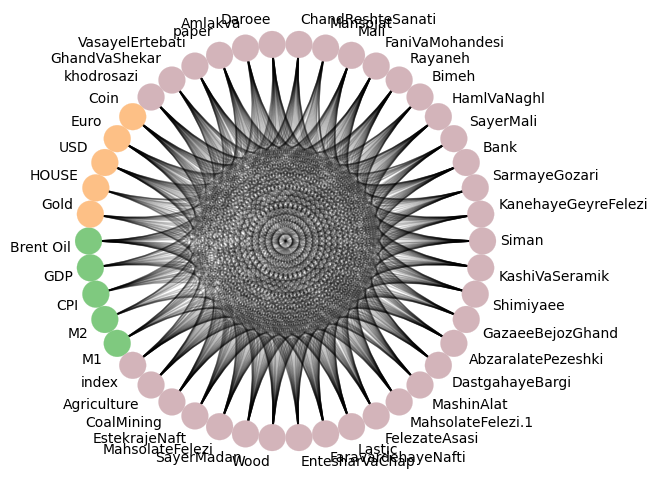

In [46]:
circos = nm.plot_circos_network(entropy_network_TwoReg_Ox_1)
circos.draw()

In [47]:
entropy_network_TwoReg_Ox_2 = nm.construct_network(tehran_df_TwoReg_Ox_2_same_length, method='entropy', threshold=thr12)

In [48]:
nm.get_network_features(entropy_network_TwoReg_Ox_2)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.7343,760,0.742784,0.7343,0.006039,0.793597,1.2657


<Figure size 1600x1200 with 0 Axes>

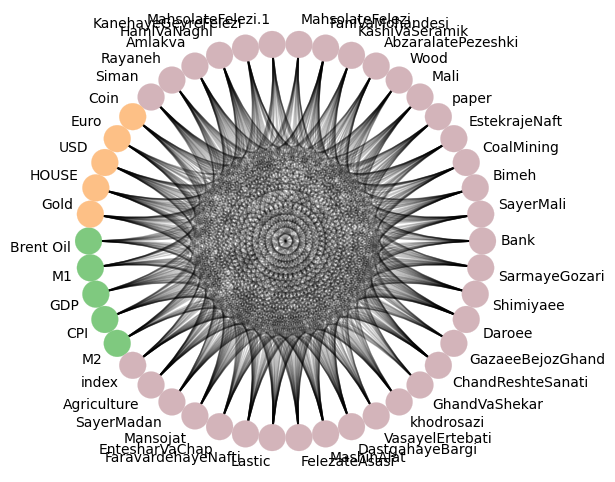

In [49]:
circos = nm.plot_circos_network(entropy_network_TwoReg_Ox_2)
circos.draw()

# 13) Tehran 2 Regime Entropy (Based on Median Threshold) Period of 90 Far - 98 Dey/ Last 100 Records

In [50]:
thr13_1 = nm.find_median_entropy_threshold(tehran_df_TwoReg_Ox_1_same_length_98[-100:])
thr13_2 = nm.find_median_entropy_threshold(tehran_df_TwoReg_Ox_2_same_length_98[-100:])
thr13 = min(thr13_1, thr13_2)

In [51]:
entropy_network_TwoReg_Ox_1_98_last100 = nm.construct_network(tehran_df_TwoReg_Ox_1_same_length_98[-100:], method='entropy', threshold=thr13)

In [52]:
nm.get_network_features(entropy_network_TwoReg_Ox_1_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.789899,782,0.809717,0.789899,0.004886,0.832214,1.210101


In [53]:
entropy_network_TwoReg_Ox_2_98_last100 = nm.construct_network(tehran_df_TwoReg_Ox_2_same_length_98[-100:], method='entropy', threshold=thr13)

In [54]:
nm.get_network_features(entropy_network_TwoReg_Ox_2_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.717172,710,0.754899,0.717172,0.006577,0.786319,1.282828


# 14) Tehran 2 Regime Entropy (Based on Median Threshold) Period of 90 Far - 98 Dey/ 50 windows of 100 Records

In [ ]:
nm = Net_moduls()
entropy_network_TwoReg_Ox_90_98_averged = nm.get_network_features_averaged_median(tehran_df, \
                                                                                  regimes_column= tehran_df_reg['Ox_2'],\
                                                                                  method='entropy',edges_threshold=200, \
                                                                                  target_window=100, \
                                                                                  target_length=50)

Number of columns data in our DataFrame is = 46


In [ ]:
entropy_network_TwoReg_Ox_90_98_averged

# 15) Tehran 2 Regime Entropy (Based on Median Threshold) Period of 90 Far - 00 Far/ 50 windows of 100 Records

In [ ]:
nm = Net_moduls()
entropy_network_TwoReg_Ox_90_00_averged = nm.get_network_features_averaged_median(tehran_df_completeDates, \
                                                                                  regimes_column= tehran_df_reg['Ox_2'],\
                                                                                  method='entropy',edges_threshold=200, \
                                                                                  target_window=100, target_length=50)

In [ ]:
entropy_network_TwoReg_Ox_90_00_averged